In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 문제 1

In [3]:
def kmeans_predict_plot(x, k):
  model = cluster.KMeans(n_clusters=k, n_init=10)
  model.fit(x)
  labels = model.predict(x)
  avg_score = silhouette_score(x, labels)
  print(f'모든 데이터의 실루엣 계수 평균 : {avg_score}')
  cal_avg_score_of_each_cluster(x, labels)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('k-Means Clustering, k={}'.format(k))
  plt.scatter(x[:, 0], x[:, 1], color=colors[labels])

In [4]:
def cal_avg_score_of_each_cluster(x, labels):
  clusters = {}
  length = len(labels)
  sil_score = silhouette_samples(x, labels)

  for i in range(length):
    if labels[i] not in clusters.keys():
      clusters[labels[i]] = [sil_score[i]]
    else:
      clusters[labels[i]].append(sil_score[i])

  result = sorted(clusters.items(), key=lambda x: x[0])

  for item in result:
    avg = sum(item[1]) / len(item[1])
    print(f'[cluster {item[0]}]에 속하는 데이터들의 실루엣 계수 평균 : {avg}')

In [5]:
path = "./drive/MyDrive/colab/ML_lab/"
file = path+"Iris.csv"

data = pd.read_csv(file).values
# x = data[:, :-1]

모든 데이터의 실루엣 계수 평균 : 0.6798027978812322
[cluster 0]에 속하는 데이터들의 실루엣 계수 평균 : 0.6084735717349957
[cluster 1]에 속하는 데이터들의 실루엣 계수 평균 : 0.8182654133415733


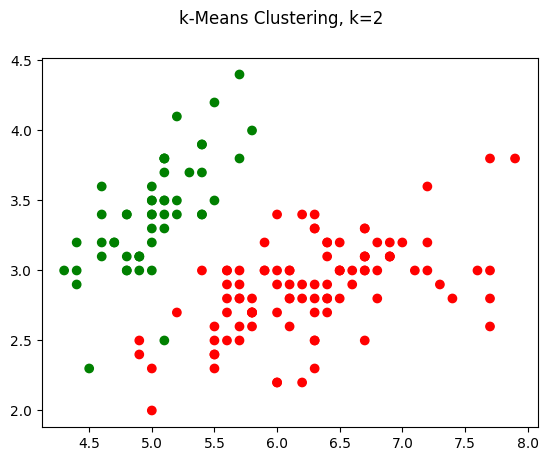

In [6]:
kmeans_predict_plot(data, 2)

모든 데이터의 실루엣 계수 평균 : 0.5816937070990904
[cluster 0]에 속하는 데이터들의 실루엣 계수 평균 : 0.7988891945432219
[cluster 1]에 속하는 데이터들의 실루엣 계수 평균 : 0.49443053544036775
[cluster 2]에 속하는 데이터들의 실루엣 계수 평균 : 0.4508905924539526


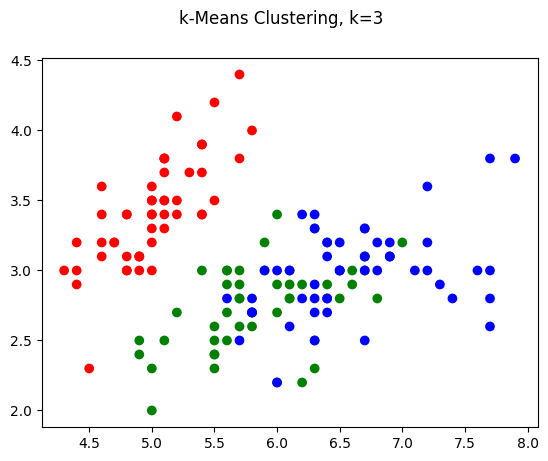

In [7]:
kmeans_predict_plot(data, 3)

모든 데이터의 실루엣 계수 평균 : 0.5384620014392415
[cluster 0]에 속하는 데이터들의 실루엣 계수 평균 : 0.3877569615363746
[cluster 1]에 속하는 데이터들의 실루엣 계수 평균 : 0.7978621069856108
[cluster 2]에 속하는 데이터들의 실루엣 계수 평균 : 0.4274671729442716
[cluster 3]에 속하는 데이터들의 실루엣 계수 평균 : 0.39597040029161656


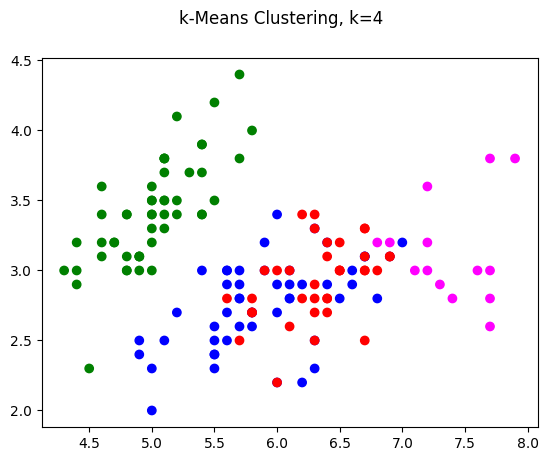

In [8]:
kmeans_predict_plot(data, 4)

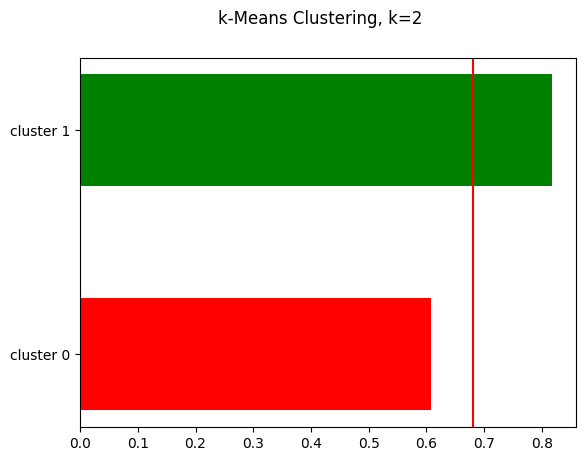

In [12]:
x1 = ['cluster 0','cluster 1']
y1 = [0.6084735717349957, 0.8182654133415733]

plt.barh(x1, y1, color=['red', 'green'], height=0.5)

plt.axvline(x=0.6798027978812322, ymin=0, ymax=1, color='red', linestyle='solid')

plt.suptitle('k-Means Clustering, k=2')

plt.show()

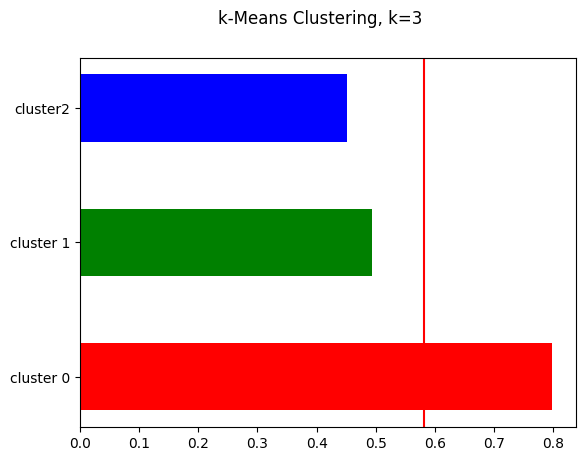

In [13]:
x2 = ['cluster 0','cluster 1', 'cluster2']
y2 = [0.7988891945432219, 0.49443053544036775, 0.4508905924539526]

plt.barh(x2, y2, color=['red', 'green', 'blue'], height=0.5)

plt.axvline(x=0.5816937070990904, ymin=0, ymax=1, color='red', linestyle='solid')

plt.suptitle('k-Means Clustering, k=3')

plt.show()

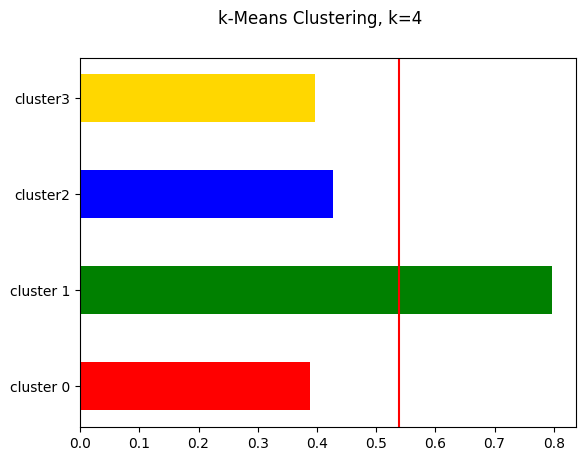

In [14]:
x3 = ['cluster 0','cluster 1', 'cluster2', 'cluster3']
y3 = [0.3877569615363746, 0.7978621069856108, 0.4274671729442716, 0.39597040029161656]

plt.barh(x3, y3, color=['red', 'green', 'blue', 'gold'], height=0.5)

plt.axvline(x=0.5384620014392415, ymin=0, ymax=1, color='red', linestyle='solid')

plt.suptitle('k-Means Clustering, k=4')

plt.show()